In [60]:
import os
notebook_path = os.path.abspath("python.ipynb")
file_short = os.path.join(os.path.dirname(notebook_path), "results_short.txt")
file_long = os.path.join(os.path.dirname(notebook_path), "results_long.txt")

def extract_data(lines):
  results = []
  for line in lines:
    obj = {}
    data = line.split(" ")
    obj["len_str"] = int(data[0])
    obj["len_substr"] = int(data[1])
    obj["seq_time"] = float(data[2])
    obj["par_time"] = float(data[3])
    results.append(obj)
  return results


with open(file_short) as res_short, open(file_long) as res_long:
    short_lines = res_short.readlines()
    long_lines = res_long.readlines()

    results_short = extract_data(short_lines)
    results_long = extract_data(long_lines)


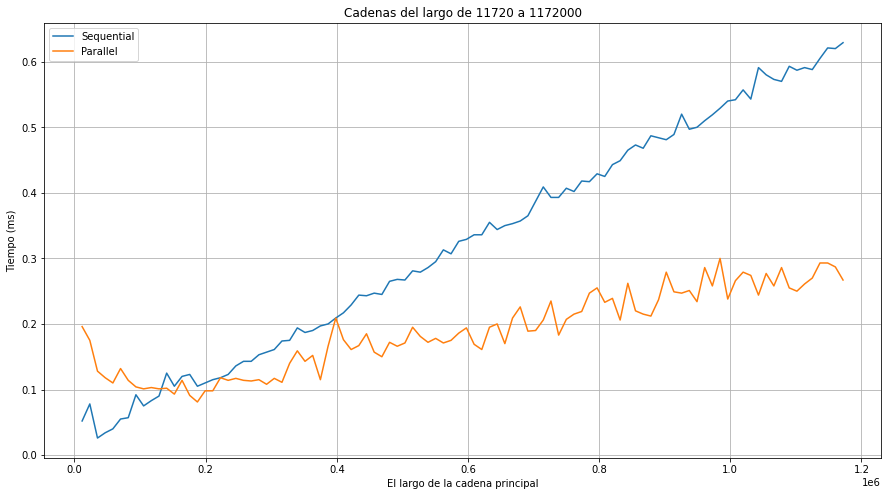

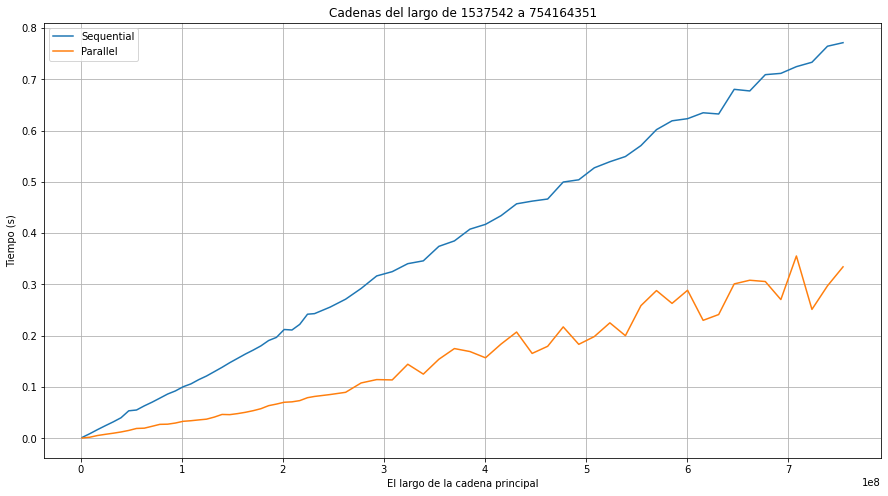

In [61]:
import matplotlib.pyplot as plt

def plot(results, scale_to_ms = False, img_name = None, title = None):
  times_seq = list(map(lambda obj: obj["seq_time"], results))
  times_par = list(map(lambda obj: obj["par_time"], results))
  str_lens = list(map(lambda obj: obj["len_str"], results))
  substr_len = results[0]["len_substr"]

  fig, ax = plt.subplots(figsize=(15, 8))
  if scale_to_ms:
    times_seq = list(map(lambda x: x * 1000, times_seq))
    times_par = list(map(lambda x: x * 1000, times_par))
  ax.plot(str_lens,times_seq, label="Sequential")
  ax.plot(str_lens, times_par, label="Parallel")

  y_label =  "Tiempo (ms)" if scale_to_ms else "Tiempo (s)"
  title = f"Search string length: {substr_len}" if title is None else title
  ax.set(xlabel="El largo de la cadena principal", ylabel=y_label,
        title=title)
  ax.grid()
  ax.legend()

  if img_name is not None:
    fig.savefig(img_name)
  plt.show()

plot(results_short, True, img_name="results_short.png", title="Cadenas del largo de 11720 a 1172000")
plot(results_long, img_name="results_long.png", title="Cadenas del largo de 1537542 a 754164351")